In [257]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import func, create_engine, inspect

import numpy as np
import pandas as pd
import statistics

In [258]:
OV10642_FT_Yield = pd.read_csv("Example_Data.csv")

In [259]:
OV10642_FT_Yield_col = OV10642_FT_Yield.columns
for i in range(9, len(OV10642_FT_Yield_col)):
    if "%" not in OV10642_FT_Yield_col[i]:
        del OV10642_FT_Yield[OV10642_FT_Yield_col[i]]
OV10642_FT_Yield = OV10642_FT_Yield.replace({"%":""}, regex = True)

In [260]:
def item_list(data,start,total):
    data['Final Yield(%)'] = pd.to_numeric(data['Final Yield(%)'])
    update_list = ['week','Lot #','Tot Qty','Final Yield(%)']
    for c in range(start, len(total)):
        data[total[c]] = pd.to_numeric(data[total[c]])
        update_list.append(total[c])
    return update_list

In [261]:
columns_update = OV10642_FT_Yield.columns
bin_column = 0
for name in columns_update:
    if name != 'App (%)':
        bin_column += 1
    else:
        break
#FT bins:
final_list = item_list(OV10642_FT_Yield, bin_column, columns_update)

final_list

['week',
 'Lot #',
 'Tot Qty',
 'Final Yield(%)',
 'App (%)',
 '12io_open(%)',
 '13io_short(%)',
 '14io_op_shrt(%)',
 '15power_shrt(%)',
 '16open_hdc(%)',
 '17iout_other1(%)',
 '18iout_other2(%)',
 '19idd_int_pwdn(%)',
 '20IDDpwdn(%)',
 '21Leakage(%)',
 '22IDDA sccb(%)',
 '23IDDS sccb(%)',
 '24IDDS_INT_XSHUTDOWN(%)',
 '25IOUT_VREF(%)',
 '26LEAKAGE_L(%)',
 '27IDDA_INT_XSHUTDOWN(%)',
 '28IOUT_OTHER3(%)',
 '29SCCB_PID(%)',
 '30SCCB_WR(%)',
 '31PCLK_FREQ(%)',
 '32OFFSET_TEST()%',
 '33SCAN_Xm(%)',
 '34wake_up(%)',
 '35OTP_PRE_CUSTOMER(%)',
 '36OTP_PRE_OVT(%)',
 '37TEMPER_TEST(%)',
 '38CHAIN(%)',
 '39VSYNC_FREQ_VOLT(%)',
 '40IRE_HSYNC(%)',
 '41IRE_BURST(%)',
 '42IRE_SATURATION(%)',
 '43NTSC_OTHER1(%)',
 '44NTSC_OTHER2(%)',
 '45IOUT_OTHER4(%)',
 '46IOUT_OTHER5(%)',
 '47CHAIN_MAX(%)',
 '48SCAN_xM_MAX(%)',
 '49VOUT_VREFH(%)',
 '50VOUT_VREFN(%)',
 '51VOUT_DVDD(%)',
 '52VOUT_OTHER1(%)',
 '53VOUT_OTHER2(%)',
 '54VOUT_DVDD_STRS(%)',
 '55VOUT_VREFH_STRS(%)',
 '56VOUT_VREFN_STRS(%)',
 '57IOUT_VREF_ST

In [262]:
OV10642_FT_Yield_aft = OV10642_FT_Yield[final_list]
OV10642_summary_list = OV10642_FT_Yield_aft.to_dict('list')
#OV10642_summary_list

In [263]:
import pymongo
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)
db = client.yieldDBs
collection = db.details
collection.insert_one(OV10642_summary_list)

In [264]:
readout_data = db.details.find_one()

In [265]:
transfer_data = pd.DataFrame(readout_data)
del transfer_data["_id"]

In [266]:
#del transfer_data['_id']
item_list = list(transfer_data.columns[3:])
item_list

['Final Yield(%)',
 'App (%)',
 '12io_open(%)',
 '13io_short(%)',
 '14io_op_shrt(%)',
 '15power_shrt(%)',
 '16open_hdc(%)',
 '17iout_other1(%)',
 '18iout_other2(%)',
 '19idd_int_pwdn(%)',
 '20IDDpwdn(%)',
 '21Leakage(%)',
 '22IDDA sccb(%)',
 '23IDDS sccb(%)',
 '24IDDS_INT_XSHUTDOWN(%)',
 '25IOUT_VREF(%)',
 '26LEAKAGE_L(%)',
 '27IDDA_INT_XSHUTDOWN(%)',
 '28IOUT_OTHER3(%)',
 '29SCCB_PID(%)',
 '30SCCB_WR(%)',
 '31PCLK_FREQ(%)',
 '32OFFSET_TEST()%',
 '33SCAN_Xm(%)',
 '34wake_up(%)',
 '35OTP_PRE_CUSTOMER(%)',
 '36OTP_PRE_OVT(%)',
 '37TEMPER_TEST(%)',
 '38CHAIN(%)',
 '39VSYNC_FREQ_VOLT(%)',
 '40IRE_HSYNC(%)',
 '41IRE_BURST(%)',
 '42IRE_SATURATION(%)',
 '43NTSC_OTHER1(%)',
 '44NTSC_OTHER2(%)',
 '45IOUT_OTHER4(%)',
 '46IOUT_OTHER5(%)',
 '47CHAIN_MAX(%)',
 '48SCAN_xM_MAX(%)',
 '49VOUT_VREFH(%)',
 '50VOUT_VREFN(%)',
 '51VOUT_DVDD(%)',
 '52VOUT_OTHER1(%)',
 '53VOUT_OTHER2(%)',
 '54VOUT_DVDD_STRS(%)',
 '55VOUT_VREFH_STRS(%)',
 '56VOUT_VREFN_STRS(%)',
 '57IOUT_VREF_STRS(%)',
 '58VOUT_OTHER3(%)',
 '

In [267]:
def fixed_window(weeklist):
    if len(weeklist)-9 > 0:
        update_week_list = weeklist[(len(weeklist)-9):]
    else:
        update_week_list = weeklist
        
    return update_week_list

In [268]:
week_group = transfer_data.groupby(['week']).count()
weeks = list(week_group.index.values)
update_list = fixed_window(weeks)
    
#transfer_data.loc[transfer_data['week'] != weeks[1],:]
update_list


['W1922',
 'W1923',
 'W1924',
 'W1925',
 'W1926',
 'W1927',
 'W1928',
 'W1929',
 'W1930']

In [269]:
yield_dict = {}
transfer_data['sum'] = transfer_data['Tot Qty'] * transfer_data['205SPI(%) ']
transfer_data_gp = transfer_data.groupby(['week']).sum()
week_len = len(transfer_data_gp.index.values.tolist())
if week_len > 9:
    transfer_data_gp = transfer_data_gp[(week_len - 9):]
    
yield_dict['205SPI(%)'] = transfer_data_gp['sum'].tolist()
yield_dict['total_die'] = transfer_data_gp['Tot Qty'].tolist()
yield_dict['week'] = transfer_data_gp.index.values.tolist()
FT_Yield = pd.DataFrame(yield_dict)
FT_Yield['205SPI(%)'] = FT_Yield['205SPI(%)'] / FT_Yield['total_die']
yield_dict['205SPI(%)'] = FT_Yield['205SPI(%)'].tolist()

In [270]:
transfer_data_gp.head()

,Tot Qty,Final Yield(%),App (%),12io_open(%),13io_short(%),14io_op_shrt(%),15power_shrt(%),16open_hdc(%),17iout_other1(%),18iout_other2(%),...,417GrabImage fail(%),418VoltageFai(%),419InitialCard fail or SetVideoMode fail(%),424FileError or ScriptError(%),491SpecialFail16(%),492SpecialFail17(%),493SpecialFail18(%),499SLT2_Error(%),520Reserve9(%),sum
week,,,,,,,,,,,,,,,,,,,,,
W1922,29489,1149.46,4.8,1.9,1.5,0.0,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9850.8
W1923,16084,361.96,1.6,1.3,0.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4605.6
W1924,46243,999.11,3.0,1.1,1.4,0.0,0.2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10293.6
W1925,75475,1630.84,7.1,1.4,2.8,0.0,0.6,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14939.8
W1926,121750,2373.90,6.3,1.6,3.8,0.0,0.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30095.1


In [274]:
total_die = transfer_data['Tot Qty'].sum()
item_fr_dict = {}

#FT Yield:
transfer_data['sumproduct'] = transfer_data['Tot Qty'] * transfer_data['Final Yield(%)']
item_fr_dict['Final Yield(%)'] = transfer_data['sumproduct'].sum() / total_die

#The other Bins:
for c in range(bin_column, len(columns_update)):
    transfer_data['sumproduct'] = transfer_data['Tot Qty'] * transfer_data[columns_update[c]]
    item_fr_dict[columns_update[c]] = transfer_data['sumproduct'].sum() / total_die
del transfer_data['sumproduct']
pd.DataFrame(item_fr_dict, index=[0]).T.rename(columns = {0:'Performance'}).reset_index(drop = False)

,index,Performance
0,Final Yield(%),90.868128
1,App (%),0.222246
2,12io_open(%),0.108164
3,13io_short(%),0.214297
4,14io_op_shrt(%),0.002435
5,15power_shrt(%),0.017638
6,16open_hdc(%),0.000000
7,17iout_other1(%),0.000000
8,18iout_other2(%),0.000000
9,19idd_int_pwdn(%),0.000000


In [286]:
item_fr_df = pd.DataFrame(item_fr_dict, index=[0])
item_fr_df = item_fr_df.T.rename(columns = {0:'Performance'})
item_fr_df = item_fr_df.reset_index(drop = False).rename(columns = {'index': 'FT_Item'})
FT_list_all = item_fr_df['FT_Item'].tolist()
index_stop = 0
for item in FT_list_all:
    if item != '96OTHERS1(%)':
        index_stop += 1
    else:
        break
FT_summary_df = item_fr_df[0:index_stop].sort_values('Performance', ascending = False).reset_index(drop=True)
FT_list = list(FT_summary_df['FT_Item'][:7])
#FT_top10_df = FT_summary_df[:11].reset_index(drop=True)
#FT_list.remove('App (%)')
FT_summary_df.head(7)

,FT_Item,Performance
0,Final Yield(%),90.868128
1,App (%),0.222246
2,13io_short(%),0.214297
3,21Leakage(%),0.162785
4,90MBIST_RESULT2_MAX(%),0.127211
5,12io_open(%),0.108164
6,36OTP_PRE_OVT(%),0.106014


In [17]:
index_start= 0
for item in FT_list_all:
    if item != '101SpecialPASS1(%)':
        index_start += 1
    else:
        break
SLT_summary_df = item_fr_df[index_start:].sort_values('Performance', ascending = False)
SLT_summary_df = SLT_summary_df.rename(columns = {'FT_Item':'SLT_Item'})
SLT_list = list(SLT_summary_df['SLT_Item'][:10])
#SLT_top10_df = SLT_summary_df[:10].reset_index(drop=True)
SLT_list

['305BRIGHT_DEAD_OR_WHITE_PIXEL_FOR_YUV_MJPG(%)',
 '315DARK_DEFECT_SLIGHT_PIXEL_FOR_ANALOG(%)',
 '225COLOR_FIDELITY(%)',
 '255SHADING_FOR_YUV_MJPG(%)',
 '354DARK_DEAD_CLUSTER_FOR_ANALOG(%)',
 '314DARK_DEFECT_SLIGHT_PIXEL_FOR_YUV_MJPG(%)',
 '325BRIGHT_CLUSTER_FOR_SMALL_LOW(%)',
 '355Reserve8(%)',
 '215LINE_NOISE(%)',
 '254SHADING_FOR_RAW(%)']

In [18]:
def bin_realperformance(data, total):
    yield_dict = {}
    for item in total:
        data['sum'] = data['Tot Qty'] * data[item]
        transfer_data_gp = data.groupby(['week']).sum()
        yield_dict[item] = transfer_data_gp['sum'].tolist()
        yield_dict['total_die'] = transfer_data_gp['Tot Qty'].tolist()
        yield_dict['week'] = transfer_data_gp.index.values.tolist()
        FT_Yield = pd.DataFrame(yield_dict)
        FT_Yield[item] = FT_Yield[item] / FT_Yield['total_die']
        yield_dict[item] = FT_Yield[item].tolist()

    return yield_dict    

In [283]:
total_items = FT_list
result = bin_realperformance(transfer_data, total_items)

yield_WeeklyAvg = pd.DataFrame(result).set_index('week')
yield_WeeklyAvg.drop('total_die', axis = 1)
loss_WeeklyAvg = yield_WeeklyAvg.T[2:]

loss_dict = {}
item_list = []
fail_list = []
loss_Weekly = loss_WeeklyAvg.to_dict()
for key,value in loss_Weekly['W1924'].items():
    item_list.append(key)
    fail_list.append(value)
loss_dict['item'] = item_list
loss_dict['fail'] = fail_list
loss_WeeklyAvg = loss_WeeklyAvg.reset_index(drop = False).rename(columns={'index':'item'})
loss_WeeklyAvg

week,item,W1922,W1923,W1924,W1925,W1926,W1927,W1928,W1929,W1930
0,App (%),0.278541,0.388293,0.266698,0.301606,0.212638,0.117771,0.177388,0.224784,0.238559
1,13io_short(%),0.087344,0.097407,0.131447,0.151108,0.150158,0.143330,0.128906,0.350942,0.488031
2,21Leakage(%),0.000000,0.000000,0.107694,0.112946,0.095309,0.115708,0.101446,0.274767,0.416800
3,90MBIST_RESULT2_MAX(%),0.163559,0.030428,0.084549,0.146157,0.169616,0.110182,0.110244,0.102540,0.152342
4,12io_open(%),0.154800,0.330938,0.091644,0.086437,0.059434,0.115851,0.086589,0.104555,0.181780
5,36OTP_PRE_OVT(%),0.192658,0.067359,0.107216,0.041203,0.077676,0.065136,0.049615,0.134055,0.269192


In [284]:
#Yield/loss by week:
week_list = ['week']
first_list = week_list + FT_list + SLT_list
yield_weekly = transfer_data.loc[:, first_list]
yield_WeeklyAvg = yield_weekly.groupby(['week']).mean()

In [285]:
first_df = yield_WeeklyAvg.reset_index(drop=False)
qty_weekly = transfer_data.loc[:, ['week','Tot Qty']]
qty_WeeklySum = qty_weekly.groupby(['week']).sum()
first_df['Tot Qty'] =  list(qty_WeeklySum['Tot Qty'])
first_df.head()

,week,Final Yield(%),App (%),13io_short(%),21Leakage(%),90MBIST_RESULT2_MAX(%),12io_open(%),36OTP_PRE_OVT(%),305BRIGHT_DEAD_OR_WHITE_PIXEL_FOR_YUV_MJPG(%),315DARK_DEFECT_SLIGHT_PIXEL_FOR_ANALOG(%),225COLOR_FIDELITY(%),255SHADING_FOR_YUV_MJPG(%),354DARK_DEAD_CLUSTER_FOR_ANALOG(%),314DARK_DEFECT_SLIGHT_PIXEL_FOR_YUV_MJPG(%),325BRIGHT_CLUSTER_FOR_SMALL_LOW(%),355Reserve8(%),215LINE_NOISE(%),254SHADING_FOR_RAW(%),Tot Qty
0,W1922,88.420000,0.369231,0.115385,0.000000,0.246154,0.146154,0.146154,1.776923,0.869231,0.553846,0.923077,0.453846,0.538462,0.330769,0.776923,0.253846,0.253846,29489
1,W1923,90.490000,0.400000,0.100000,0.000000,0.025000,0.325000,0.075000,1.675000,0.825000,0.600000,1.100000,0.750000,0.200000,0.325000,0.425000,0.325000,0.175000,16084
2,W1924,90.828182,0.272727,0.127273,0.100000,0.090909,0.100000,0.100000,0.863636,0.754545,0.681818,0.554545,0.681818,0.472727,0.563636,0.600000,0.436364,0.145455,46243
3,W1925,90.602222,0.394444,0.155556,0.105556,0.166667,0.077778,0.033333,0.961111,0.838889,0.633333,0.738889,0.611111,0.622222,0.694444,0.483333,0.327778,0.288889,75475
4,W1926,91.303846,0.242308,0.146154,0.096154,0.165385,0.061538,0.080769,0.930769,0.815385,0.719231,0.588462,0.592308,0.650000,0.519231,0.430769,0.288462,0.273077,121750


In [22]:
yield_WeeklyAvg = yield_WeeklyAvg.T
loss_WeeklyAvg = yield_WeeklyAvg.drop("Final Yield(%)")
loss_WeeklyAvg.head()

week,W1922,W1923,W1924,W1925,W1926,W1927,W1928,W1929,W1930
App (%),0.369231,0.400,0.272727,0.394444,0.242308,0.116667,0.178261,0.219355,0.248077
13io_short(%),0.115385,0.100,0.127273,0.155556,0.146154,0.133333,0.134783,0.370968,0.292308
21Leakage(%),0.000000,0.000,0.100000,0.105556,0.096154,0.122222,0.108696,0.283871,0.221154
90MBIST_RESULT2_MAX(%),0.246154,0.025,0.090909,0.166667,0.165385,0.105556,0.108696,0.119355,0.121154
12io_open(%),0.146154,0.325,0.100000,0.077778,0.061538,0.107778,0.088261,0.105484,0.146923


In [23]:
loss_dict = {}
item_list = []
fail_list = []
loss_Weekly = loss_WeeklyAvg.to_dict()
for key,value in loss_Weekly['W1923'].items():
    item_list.append(key)
    fail_list.append(value)
loss_dict['item'] = item_list
loss_dict['fail'] = fail_list
loss_dict

{'item': ['App (%)',
  '13io_short(%)',
  '21Leakage(%)',
  '90MBIST_RESULT2_MAX(%)',
  '12io_open(%)',
  '36OTP_PRE_OVT(%)',
  '305BRIGHT_DEAD_OR_WHITE_PIXEL_FOR_YUV_MJPG(%)',
  '315DARK_DEFECT_SLIGHT_PIXEL_FOR_ANALOG(%)',
  '225COLOR_FIDELITY(%)',
  '255SHADING_FOR_YUV_MJPG(%)',
  '354DARK_DEAD_CLUSTER_FOR_ANALOG(%)',
  '314DARK_DEFECT_SLIGHT_PIXEL_FOR_YUV_MJPG(%)',
  '325BRIGHT_CLUSTER_FOR_SMALL_LOW(%)',
  '355Reserve8(%)',
  '215LINE_NOISE(%)',
  '254SHADING_FOR_RAW(%)'],
 'fail': [0.39999999999999997,
  0.1,
  0.0,
  0.025,
  0.325,
  0.07500000000000001,
  1.675,
  0.8250000000000001,
  0.6,
  1.1,
  0.75,
  0.2,
  0.325,
  0.42500000000000004,
  0.325,
  0.175]}

In [24]:
bin_array = []
for i in range(0, len(item_list)):
    bin_dict = {}
    bin_dict['name'] = item_list[i]
    bin_dict['rate'] = fail_list[i]
    bin_array.append(bin_dict)
bin_array

[{'name': 'App (%)', 'rate': 0.39999999999999997},
 {'name': '13io_short(%)', 'rate': 0.1},
 {'name': '21Leakage(%)', 'rate': 0.0},
 {'name': '90MBIST_RESULT2_MAX(%)', 'rate': 0.025},
 {'name': '12io_open(%)', 'rate': 0.325},
 {'name': '36OTP_PRE_OVT(%)', 'rate': 0.07500000000000001},
 {'name': '305BRIGHT_DEAD_OR_WHITE_PIXEL_FOR_YUV_MJPG(%)', 'rate': 1.675},
 {'name': '315DARK_DEFECT_SLIGHT_PIXEL_FOR_ANALOG(%)',
  'rate': 0.8250000000000001},
 {'name': '225COLOR_FIDELITY(%)', 'rate': 0.6},
 {'name': '255SHADING_FOR_YUV_MJPG(%)', 'rate': 1.1},
 {'name': '354DARK_DEAD_CLUSTER_FOR_ANALOG(%)', 'rate': 0.75},
 {'name': '314DARK_DEFECT_SLIGHT_PIXEL_FOR_YUV_MJPG(%)', 'rate': 0.2},
 {'name': '325BRIGHT_CLUSTER_FOR_SMALL_LOW(%)', 'rate': 0.325},
 {'name': '355Reserve8(%)', 'rate': 0.42500000000000004},
 {'name': '215LINE_NOISE(%)', 'rate': 0.325},
 {'name': '254SHADING_FOR_RAW(%)', 'rate': 0.175}]

In [25]:
#Spec:
FT_spec_summary = {}
total_list = FT_list + SLT_list
for item in total_list:
    if item == 'Final Yield(%)':
        FT_spec_summary[item] = statistics.median(transfer_data[item])\
        - (4 * statistics.stdev(transfer_data[item]))
    else:
        FT_spec_summary[item] = statistics.median(transfer_data[item])\
        + (4 * statistics.stdev(transfer_data[item]))
        
FT_spec_summary

{'Final Yield(%)': 79.73548719082547,
 'App (%)': 1.2896074406284799,
 '13io_short(%)': 3.00833767780537,
 '21Leakage(%)': 2.6771194657937984,
 '90MBIST_RESULT2_MAX(%)': 0.7347877760872576,
 '12io_open(%)': 0.858828279232074,
 '36OTP_PRE_OVT(%)': 1.6453794938257407,
 '305BRIGHT_DEAD_OR_WHITE_PIXEL_FOR_YUV_MJPG(%)': 2.612814997938712,
 '315DARK_DEFECT_SLIGHT_PIXEL_FOR_ANALOG(%)': 2.1625414121954867,
 '225COLOR_FIDELITY(%)': 2.1602996760609496,
 '255SHADING_FOR_YUV_MJPG(%)': 2.6302381843753353,
 '354DARK_DEAD_CLUSTER_FOR_ANALOG(%)': 1.8030590696492883,
 '314DARK_DEFECT_SLIGHT_PIXEL_FOR_YUV_MJPG(%)': 2.405699402987616,
 '325BRIGHT_CLUSTER_FOR_SMALL_LOW(%)': 1.8805238693503832,
 '355Reserve8(%)': 1.636703641716922,
 '215LINE_NOISE(%)': 1.4166894332910391,
 '254SHADING_FOR_RAW(%)': 1.0755149490185747}

In [26]:
#FT/SLT item performances:
FT_item_list = []
FT_loss_list = []
for key,value in FT_spec_summary.items():
    FT_item_list.append(key)
    FT_loss_list.append(value)

In [27]:
transfer_data.head()

,week,Lot #,Tot Qty,Final Yield(%),App (%),12io_open(%),13io_short(%),14io_op_shrt(%),15power_shrt(%),16open_hdc(%),...,417GrabImage fail(%),418VoltageFai(%),419InitialCard fail or SetVideoMode fail(%),424FileError or ScriptError(%),491SpecialFail16(%),492SpecialFail17(%),493SpecialFail18(%),499SLT2_Error(%),520Reserve9(%),sum
0,W1922,Q03K29.1-W2,3303,90.68,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,330.3
1,W1922,Q03R06.1-W6,4632,90.82,0.5,0.0,0.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,926.4
2,W1922,Q01F55.U2-W1,400,89.75,0.5,0.0,0.3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,W1922,Q00R47.1-W1,5368,92.75,0.4,0.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,536.8
4,W1922,Q03R00.1-W6,3363,88.17,0.4,0.3,0.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1345.2


In [28]:
#FT weekly bad lots:
FT_lot_summary = {}
for i in range(0, len(FT_item_list)):
    if FT_item_list[i] == 'Final Yield(%)':
        FT_specific = transfer_data.loc[:,['Lot #',FT_item_list[i]]]
        FT_specific = FT_specific.loc[FT_specific[FT_item_list[i]] < FT_loss_list[i],:]
        FT_lot_summary[FT_item_list[i]] = list(FT_specific['Lot #'])
    else:
        FT_specific = transfer_data.loc[:,['Lot #',FT_item_list[i]]]
        FT_specific = FT_specific.loc[FT_specific[FT_item_list[i]] > FT_loss_list[i],:]
        FT_lot_summary[FT_item_list[i]] = list(FT_specific['Lot #'])
        
FT_lot_summary

{'Final Yield(%)': ['Q01T26.1-W5'],
 'App (%)': ['Q01M85.1-W2', 'Q05S43.1-W2', 'QSY655.U1-W2'],
 '13io_short(%)': ['Q01T23.1-W1', 'Q01T26.1-W5'],
 '21Leakage(%)': ['Q01T23.1-W1', 'Q01T26.1-W5'],
 '90MBIST_RESULT2_MAX(%)': ['QVM134.1-W4', 'QVK376.1-W3'],
 '12io_open(%)': ['Q01T23.1-W2', 'Q01F52.U3-W1', 'Q01T26.1-W5'],
 '36OTP_PRE_OVT(%)': ['Q01T23.1-W1', 'Q01T26.1-W5'],
 '305BRIGHT_DEAD_OR_WHITE_PIXEL_FOR_YUV_MJPG(%)': ['Q00R47.1-W2'],
 '315DARK_DEFECT_SLIGHT_PIXEL_FOR_ANALOG(%)': [],
 '225COLOR_FIDELITY(%)': [],
 '255SHADING_FOR_YUV_MJPG(%)': ['Q08H94.1-W3', 'Q08H94.4-W1'],
 '354DARK_DEAD_CLUSTER_FOR_ANALOG(%)': [],
 '314DARK_DEFECT_SLIGHT_PIXEL_FOR_YUV_MJPG(%)': ['Q01F55.U2-W1',
  'Q01F54.1-W8'],
 '325BRIGHT_CLUSTER_FOR_SMALL_LOW(%)': ['Q01M85.1-W2'],
 '355Reserve8(%)': ['QVM134.1-W4', 'Q08H94.1-W5'],
 '215LINE_NOISE(%)': ['Q06N51.1-W1', 'QSY655.1-W1'],
 '254SHADING_FOR_RAW(%)': []}

# Create a Deep Learning Model

In [64]:
import tensorflow.keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dense, Dropout, LSTM, Activation
from pandas import Series
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import backend
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [76]:
transfer_data.head()

,week,Lot #,Tot Qty,Final Yield(%),App (%),12io_open(%),13io_short(%),14io_op_shrt(%),15power_shrt(%),16open_hdc(%),...,416FOR_SensorTemperatureCheckFail(%),417GrabImage fail(%),418VoltageFai(%),419InitialCard fail or SetVideoMode fail(%),424FileError or ScriptError(%),491SpecialFail16(%),492SpecialFail17(%),493SpecialFail18(%),499SLT2_Error(%),520Reserve9(%)
0,W1922,Q03K29.1-W2,3303,90.68,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,W1922,Q03R06.1-W6,4632,90.82,0.5,0.0,0.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,W1922,Q01F55.U2-W1,400,89.75,0.5,0.0,0.3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,W1922,Q00R47.1-W1,5368,92.75,0.4,0.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,W1922,Q03R00.1-W6,3363,88.17,0.4,0.3,0.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
pip install stats

  Stored in directory: C:\Users\eugene.chu1\AppData\Local\pip\Cache\wheels\1f\64\c9\da1748f4ce76935afc665178ead2217b90147bac5ca096aa56
Successfully built stats
Note: you may need to restart the kernel to use updated packages.


In [120]:
from stats import median
target_item = np.array(transfer_data["Final Yield(%)"].tolist())
mid = median(target_item)
q1 = np.percentile(target_item, 25)
q3 = np.percentile(target_item, 75)
robust_sigma = (q3 - q1) / 1.35
LSL = mid - (3 * robust_sigma)
LSL

86.06388888888888

In [121]:
bins = [0, LSL, 100]
group_names = ["bad", "good"]
transfer_data["rate"] = pd.cut(transfer_data["Final Yield(%)"], bins, labels=group_names)

X = transfer_data.drop(["week","Lot #","Tot Qty","Final Yield(%)","rate"], axis = 1)
y = transfer_data["rate"]

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
print(X_train.shape, X_test.shape)

(147, 237) (49, 237)


In [123]:
X_scaler = MinMaxScaler().fit(X_train)
X_trained_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [124]:
label_encoder = LabelEncoder().fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [125]:
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=237))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [126]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [127]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 100)               23800     
_________________________________________________________________
dense_11 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 202       
Total params: 34,102
Trainable params: 34,102
Non-trainable params: 0
_________________________________________________________________


In [128]:
model.fit(
    X_trained_scaled,
    y_train_categorical,
    epochs=60,
    shuffle=True,
    verbose=2
)

Epoch 1/60
147/147 - 0s - loss: 0.6679 - acc: 0.6667
Epoch 2/60
147/147 - 0s - loss: 0.5132 - acc: 0.9592
Epoch 3/60
147/147 - 0s - loss: 0.3870 - acc: 0.9592
Epoch 4/60
147/147 - 0s - loss: 0.2821 - acc: 0.9592
Epoch 5/60
147/147 - 0s - loss: 0.2125 - acc: 0.9592
Epoch 6/60
147/147 - 0s - loss: 0.1845 - acc: 0.9592
Epoch 7/60
147/147 - 0s - loss: 0.1730 - acc: 0.9592
Epoch 8/60
147/147 - 0s - loss: 0.1675 - acc: 0.9592
Epoch 9/60
147/147 - 0s - loss: 0.1596 - acc: 0.9592
Epoch 10/60
147/147 - 0s - loss: 0.1501 - acc: 0.9592
Epoch 11/60
147/147 - 0s - loss: 0.1423 - acc: 0.9592
Epoch 12/60
147/147 - 0s - loss: 0.1326 - acc: 0.9592
Epoch 13/60
147/147 - 0s - loss: 0.1221 - acc: 0.9592
Epoch 14/60
147/147 - 0s - loss: 0.1156 - acc: 0.9660
Epoch 15/60
147/147 - 0s - loss: 0.1059 - acc: 0.9660
Epoch 16/60
147/147 - 0s - loss: 0.0983 - acc: 0.9660
Epoch 17/60
147/147 - 0s - loss: 0.0890 - acc: 0.9660
Epoch 18/60
147/147 - 0s - loss: 0.0816 - acc: 0.9660
Epoch 19/60
147/147 - 0s - loss: 0.07

In [129]:
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test_categorical, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

49/49 - 0s - loss: 0.0496 - acc: 0.9796
Normal Neural Network - Loss: 0.04958298172307562, Accuracy: 0.9795918464660645


In [132]:
encoded_predictions = model.predict_classes(X_test_scaled[30:40])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[30:40])}")

Predicted classes: ['good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good']
Actual Labels: ['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good']


## Quantify our Trained Model

In [254]:
seq = transfer_data["Final Yield(%)"].tolist()
X = []
y = []
for i in range(5, len(seq)):
    X.append(seq[i-5:i])
    y.append(seq[i])
X = np.array(X).reshape(len(X),5,1)
y = np.array(y).reshape(len(y),1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
print(X_train.shape, y_train.shape)

(143, 5, 1) (143, 1)


In [255]:
model = Sequential()

model.add(LSTM(10, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(28, return_sequences=False))
model.add(Dense(100, activation='linear'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_48 (LSTM)               (None, 5, 10)             480       
_________________________________________________________________
lstm_49 (LSTM)               (None, 28)                4368      
_________________________________________________________________
dense_42 (Dense)             (None, 100)               2900      
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 101       
Total params: 7,849
Trainable params: 7,849
Non-trainable params: 0
_________________________________________________________________


In [256]:
model.fit(X_train, y_train, epochs = 1000, batch_size = 10)

Epoch 1/1000
143/143 [==============================] - 15s 102ms/sample - loss: 7989.2177
Epoch 2/1000
143/143 [==============================] - 0s 3ms/sample - loss: 7075.6499
Epoch 3/1000
143/143 [==============================] - 1s 4ms/sample - loss: 5266.5991
Epoch 4/1000
143/143 [==============================] - 1s 4ms/sample - loss: 3173.19670s - loss: 3311.
Epoch 5/1000
143/143 [==============================] - 1s 4ms/sample - loss: 1575.5429
Epoch 6/1000
143/143 [==============================] - 1s 4ms/sample - loss: 673.2273 0s - loss: 757.9
Epoch 7/1000
143/143 [==============================] - 1s 5ms/sample - loss: 209.8867
Epoch 8/1000
143/143 [==============================] - ETA: 0s - loss: 40.77 - 1s 4ms/sample - loss: 37.7310
Epoch 9/1000
143/143 [==============================] - 1s 5ms/sample - loss: 10.3469
Epoch 10/1000
143/143 [==============================] - 1s 4ms/sample - loss: 9.7398 0s - los
Epoch 11/1000
143/143 [==============================] - 1s

143/143 [==============================] - 0s 2ms/sample - loss: 9.9973
Epoch 88/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.0442
Epoch 89/1000
143/143 [==============================] - 0s 2ms/sample - loss: 9.7578 0s - loss: 6.4
Epoch 90/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.0173
Epoch 91/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.8285
Epoch 92/1000
143/143 [==============================] - 0s 2ms/sample - loss: 9.9692
Epoch 93/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.0064
Epoch 94/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.2188
Epoch 95/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.2673
Epoch 96/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.4294
Epoch 97/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.3515
Epoch 98/1000
143/143 [======================

143/143 [==============================] - 0s 2ms/sample - loss: 9.9724
Epoch 179/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.2241
Epoch 180/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.6799
Epoch 181/1000
143/143 [==============================] - 0s 2ms/sample - loss: 9.9967 0s - loss: 4
Epoch 182/1000
143/143 [==============================] - 0s 2ms/sample - loss: 9.7073
Epoch 183/1000
143/143 [==============================] - 0s 2ms/sample - loss: 11.0381 0s - loss: 7.
Epoch 184/1000
143/143 [==============================] - 0s 2ms/sample - loss: 9.9427
Epoch 185/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.2286
Epoch 186/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.4610
Epoch 187/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.0327
Epoch 188/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.2585
Epoch 189/1000
143/143 [

143/143 [==============================] - 0s 2ms/sample - loss: 10.8309
Epoch 270/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.3958
Epoch 271/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.4886
Epoch 272/1000
143/143 [==============================] - 0s 2ms/sample - loss: 9.8106 0s - loss: 14
Epoch 273/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.57780s - loss: 5.9
Epoch 274/1000
143/143 [==============================] - 0s 2ms/sample - loss: 9.8533
Epoch 275/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.22690s - loss: 6
Epoch 276/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.3875
Epoch 277/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.1060
Epoch 278/1000
143/143 [==============================] - 0s 2ms/sample - loss: 9.8721
Epoch 279/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.4411
Epoch 280/

143/143 [==============================] - 0s 2ms/sample - loss: 9.8576
Epoch 361/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.1018
Epoch 362/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.2881
Epoch 363/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.1172
Epoch 364/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.8488
Epoch 365/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.0100
Epoch 366/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.2132
Epoch 367/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.3112
Epoch 368/1000
143/143 [==============================] - 0s 2ms/sample - loss: 9.9412
Epoch 369/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.1699
Epoch 370/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.5665
Epoch 371/1000
143/143 [=========================

143/143 [==============================] - ETA: 0s - loss: 12.12 - 0s 2ms/sample - loss: 10.4621
Epoch 452/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.3018
Epoch 453/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.1367
Epoch 454/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.2789
Epoch 455/1000
143/143 [==============================] - 0s 2ms/sample - loss: 9.7181
Epoch 456/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.1213
Epoch 457/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.6600
Epoch 458/1000
143/143 [==============================] - 0s 2ms/sample - loss: 9.5709 0s - loss: 5.5
Epoch 459/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.1206
Epoch 460/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.0242
Epoch 461/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.1804
Epoch 462/

143/143 [==============================] - 0s 2ms/sample - loss: 10.7096
Epoch 543/1000
143/143 [==============================] - 0s 2ms/sample - loss: 9.9269
Epoch 544/1000
143/143 [==============================] - 0s 2ms/sample - loss: 9.8789
Epoch 545/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.1941
Epoch 546/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.4897
Epoch 547/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.6649
Epoch 548/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.0351
Epoch 549/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.6062
Epoch 550/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.1918
Epoch 551/1000
143/143 [==============================] - ETA: 0s - loss: 11.47 - 0s 2ms/sample - loss: 10.0953
Epoch 552/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.6297
Epoch 553/1000
143/143 [=

143/143 [==============================] - 0s 2ms/sample - loss: 10.08850s - loss: 1
Epoch 633/1000
143/143 [==============================] - 0s 2ms/sample - loss: 9.7329
Epoch 634/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.5012
Epoch 635/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.30420s - loss: 10.49
Epoch 636/1000
143/143 [==============================] - 0s 2ms/sample - loss: 9.6378
Epoch 637/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.5834
Epoch 638/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.0820
Epoch 639/1000
143/143 [==============================] - 0s 2ms/sample - loss: 9.9272
Epoch 640/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.8193
Epoch 641/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.4602
Epoch 642/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.2696
Epoch 643/1000
143/143

143/143 [==============================] - 0s 2ms/sample - loss: 9.8285
Epoch 725/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.24330s - loss: 4.8
Epoch 726/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.5357
Epoch 727/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.2310
Epoch 728/1000
143/143 [==============================] - 0s 2ms/sample - loss: 11.3676
Epoch 729/1000
143/143 [==============================] - 0s 2ms/sample - loss: 9.7690
Epoch 730/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.2842
Epoch 731/1000
143/143 [==============================] - 0s 2ms/sample - loss: 9.8292 0s - loss: 
Epoch 732/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.2104
Epoch 733/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.4128
Epoch 734/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.6363
Epoch 735/1000
143/143 [

143/143 [==============================] - 0s 2ms/sample - loss: 10.3983
Epoch 816/1000
143/143 [==============================] - 0s 2ms/sample - loss: 9.8730
Epoch 817/1000
143/143 [==============================] - 0s 2ms/sample - loss: 11.0706
Epoch 818/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.1692
Epoch 819/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.3183
Epoch 820/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.5305
Epoch 821/1000
143/143 [==============================] - 0s 2ms/sample - loss: 9.8676 0s - loss:
Epoch 822/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.5633
Epoch 823/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.3195
Epoch 824/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.5188
Epoch 825/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.8828
Epoch 826/1000
143/143 [==============

143/143 [==============================] - 0s 2ms/sample - loss: 10.3493
Epoch 907/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.4205
Epoch 908/1000
143/143 [==============================] - 0s 2ms/sample - loss: 9.8061
Epoch 909/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.6526
Epoch 910/1000
143/143 [==============================] - 0s 2ms/sample - loss: 9.6908
Epoch 911/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.3562
Epoch 912/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.4435
Epoch 913/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.0807
Epoch 914/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.4030
Epoch 915/1000
143/143 [==============================] - ETA: 0s - loss: 11.19 - 0s 2ms/sample - loss: 9.9331
Epoch 916/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.4090
Epoch 917/1000
143/143 [==

Epoch 997/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.2456
Epoch 998/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.1239
Epoch 999/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.1086
Epoch 1000/1000
143/143 [==============================] - 0s 2ms/sample - loss: 10.3697


In [227]:
pred = model.predict(X_test)
model_loss = model.evaluate(X_test, y_test, verbose=2)

print(pred[0])

49/49 - 0s - loss: 3.5364
[90.32445]


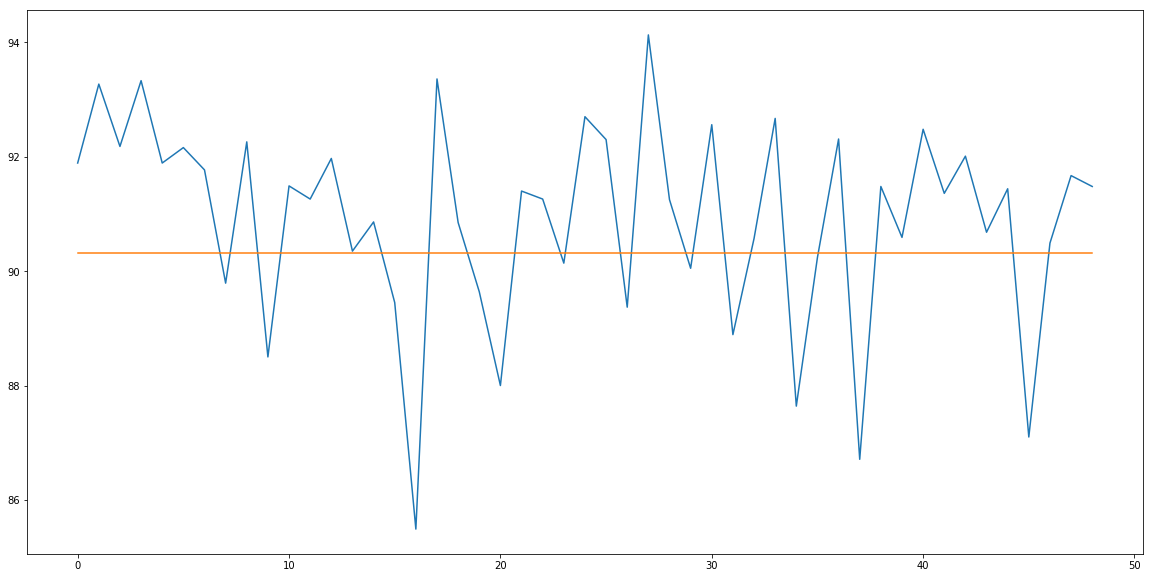

In [226]:
import matplotlib.pyplot as plt

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
#ax.legend()


## Make Predictions

C:\Users\eugene.chu1\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\sklearn\preprocessing\label.py:273: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted classes: [8 8 8 8 8]
Actual Labels: [1547, 1238, 1666, 1645, 1953]
